        *----------------------------- AUTHOR_DETAILS -------------------------------*
        |                                                                            |
        |        Project Title  = Energy Efficency Prediction System                 |
        |                                                                            |
        |        Author         = ######################                             |
        |                                                                            |
        |        Reg #          = #############                                      |
        |                                                                            |
        |        License        = Public Domain                                      |
        |                                                                            |
        |        Version        = 1.0                                                |
        |                                                                            |
        *----------------------------------------------------------------------------*

<br><br><br>
<center> <h2 style="color:blue">-------------------- PROJECT PURPOSE --------------------</h2> </center>
<br>
<center><h3 style="color:green">
The purpose of this Project is to demonstrate how the Energy Efficency Prediction (EEP) is trated as Machine learning problem using python and scikit-learn learning models </h3>
<br>
<center><h3 style="color:green"> For this Purpose, we will execute the  different Machine Learning Models </h3>
<br>
<center> <h2 style="color:blue">-------------------------------------------------------------------------</h2> </center>
<br><br><br>

<center><h1 style="color:red">Energy Efficency Prediction System – Machine Learning Cycle</h1></center>

## Machine Learning Cycle

### Four phases of a Machine Learning Cycle are

### Training Phase

    Build the Model using Training Data

### Testing Phase

     Evaluate the performance of Model using Testing Data

### Application Phase

     Deploy the Model in the Real-world, to predict Real-time unseen Data

### Feedback Phase

    Take Feedback from the Users and Domain Experts to improve the Model

<h1 style="color:red">Executing Machine Learning Cycle Using a Single File</h1>

### Now, we will follow the following Steps to execute the Machine Learning Cycle Using a Single File

#### Step 1: Import Libraries

#### Step 2: Load Sample Data

#### Step 3: Understand and Pre-process Sample Data
    
    Step 3.1: Understand Sample Data
    
    Step 3.2: Pre-process Sample Data

#### Step 4: Feature Extraction 

#### Step 5: Label Encoding (Input and Output is converted in Numeric Representation)

    Step 5.1: Train the Label Encoder

    Step 5.2: Label Encode the Output

    Step 5.3: Label Encode the Input 

#### Step 6: Execute the Training Phase

    Step 6.1: Splitting Sample Data into Training Data and Testing Data 
    
    Step 6.2: Splitting Input Vectors and Outputs/Labels of Training Data
    
    Step 6.3: Train Predcition Models
    
        Step 6.3.1: Train Linear Regression
        Step 6.3.2: Train Ridge Regression
        Step 6.3.3: Train Lasso Regression
    
    Step 6.4: Save the Trained Model


#### Step 7: Execute the Testing Phase 

    Step 7.1: Splitting Input Vectors and Output/Labels of Testing Data
    
    Step 7.2: Load the Saved Model
    
    Step 7.3: Evaluate the Performance of Trained Model
    
        Step 7.3.1: Make Predictions from the Model on Testing Data
    
    Step 7.4: Calculate the Mean Absolute Error.

#### Step 8: Execute the Application Phase 

    Step 8.1: Take Input from User 
    
    Step 8.2: Convert User Input into Feature Vector (Exactly Same as Feature Vectors of Sample Data)
    
    Step 8.3: Label Encoding of Feature Vector (Exactly Same as Label Encoded Feature Vectors of Sample Data)
    
    Step 8.4: Load the Saved Model
    
    Step 8.5: Model Prediction
        
        Step 8.5.1: Apply Model on the Label Encoded Feature Vector of unseen instance and return Prediction to the User


#### Step 9: Execute the Feedback Phase 

#### Step 10: Improve the Model based on Feedback

# Step 1: Import Libraries

In [1]:
# Import Libraries

import re
import scipy
import pickle
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from prettytable import PrettyTable
from astropy.table import Table, Column

# Step 2: Load Sample Data

In [2]:
# Load Sample Data

''' 
*---------------------- LOAD_SAMPLE_DATA ------------------------*
|     Function: read_csv()                                       |
|             Purpose: Read a dataset in CSV file format         |
|     Arguments:                                                 |
|             path: Path to dataset file                         |
|             dataset: Dataset file name 
|     Return:                                                    |
|             dataset: Dataset in DataFrame format               |
*----------------------------------------------------------------*
'''
 
sample_data = pd.read_csv("Data/datcw_na.csv")

print("\n\nSample Data:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data)



Sample Data:

     X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
0    C3  1.19  622.55     NaN   89.31  7.00  1.98  0.00  0.00  15.55
1    C1  1.19  622.55  323.40  109.15  7.70  3.00  0.00  0.00  15.55
2    C1  0.88  463.05  291.06   99.23  5.67  4.40  0.00  0.00  15.55
3    C2  0.79  509.36  291.06  121.28  6.30  4.05  0.00  0.00  15.55
4    C1  0.89  507.15  385.39  121.28  7.70  2.00  0.00  0.00  20.84
5    C1  0.89  456.44  257.98  134.75  8.47  2.43  0.00  0.00  21.46
6    C2  0.73  557.86  385.39  121.28  5.67  4.84  0.00  0.00  20.71
7    C2  0.89  507.15  315.32  148.23  6.30  4.05  0.00  0.00  19.68
8    C3  1.04  646.80  323.40  147.00  7.00  2.42  0.00  0.00  19.50
9    C3  0.77  582.12  323.40  177.87  7.70  2.97  0.00  0.00  19.95
10   C2  0.95  711.48  264.60  119.07  8.47  3.60  0.00  0.00  19.34
11   C1  0.69  529.20  238.14  119.07  8.47  4.95  0.00  0.00  18.31
12   C2  0.67  741.13  318.50  177.87  6.93  1.62  0.00  0.00  17.05
13   C3  0.74  612

# Step 3: Understand and Pre-process Sample Data
## Step 3.1: Understand Sample Data

In [3]:
# Understand Sample Data
print("\n\nAttributes in Sample Data:")
print("==========================\n")

print(sample_data.columns)

print("\n\nNumber of Instances in Sample Data:",len(sample_data.index))
print("========================================\n")

# understand the types of sample data columns
print("\n\nType of Attributes in Sample Data:")
print("=================================\n")

print(sample_data.dtypes,"\n")



Attributes in Sample Data:

Index(['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y'], dtype='object')


Number of Instances in Sample Data: 768



Type of Attributes in Sample Data:

X0     object
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y     float64
dtype: object 



In [4]:
# understand the types of sample data columns
print("\n\nCount Null values of Attributes in Sample Data:")
print("==============================================\n")

print(sample_data.isnull().sum(),'\n')



Count Null values of Attributes in Sample Data:

X0     0
X1     0
X2     0
X3    40
X4     0
X5     0
X6     0
X7     0
X8     0
Y      0
dtype: int64 



## Step 3.2: Pre-process Sample Data


In [5]:
# fill null values by mean values
mean_value = sample_data['X3'].mean()
mean_value = float("{:.2f}".format(mean_value))
sample_data['X3'].fillna(value=mean_value, inplace=True)


# understand the types of sample data columns
print("\n\nCount Null values of Attributes in Sample Data:")
print("==============================================\n")

print(sample_data.isnull().sum(),'\n')



Count Null values of Attributes in Sample Data:

X0    0
X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y     0
dtype: int64 



# Step 4: Feature Extraction
    o	Features are already Extracted
    o	No Feature Extraction needs to be Performed

# Step 5: Label Encoding the Sample Data (Input and Output is converted in Numeric Representation)

## Step 5.1: Train the Label Encoder



In [6]:
# creating instance of labelencoder
le = LabelEncoder()
le.fit(sample_data['X0'])

LabelEncoder()

## Step 5.2: Label Encode the Output
     o  As Output (ERP Attribute) is already in Numeric Representation.
     o  Therefore, we will not Label Encode the Output.

## Step 5.3: Label Encode the Input


In [7]:
sample_data['X0'] = le.transform(sample_data['X0'])

print("\n\nSample Data after preprocessing:")
print("=================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(sample_data, '\n\n')



Sample Data after preprocessing:

     X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
0     2  1.19  622.55  321.10   89.31  7.00  1.98  0.00  0.00  15.55
1     0  1.19  622.55  323.40  109.15  7.70  3.00  0.00  0.00  15.55
2     0  0.88  463.05  291.06   99.23  5.67  4.40  0.00  0.00  15.55
3     1  0.79  509.36  291.06  121.28  6.30  4.05  0.00  0.00  15.55
4     0  0.89  507.15  385.39  121.28  7.70  2.00  0.00  0.00  20.84
5     0  0.89  456.44  257.98  134.75  8.47  2.43  0.00  0.00  21.46
6     1  0.73  557.86  385.39  121.28  5.67  4.84  0.00  0.00  20.71
7     1  0.89  507.15  315.32  148.23  6.30  4.05  0.00  0.00  19.68
8     2  1.04  646.80  323.40  147.00  7.00  2.42  0.00  0.00  19.50
9     2  0.77  582.12  323.40  177.87  7.70  2.97  0.00  0.00  19.95
10    1  0.95  711.48  264.60  119.07  8.47  3.60  0.00  0.00  19.34
11    0  0.69  529.20  238.14  119.07  8.47  4.95  0.00  0.00  18.31
12    1  0.67  741.13  318.50  177.87  6.93  1.62  0.00  0.00  17.0

In [8]:
# understand the types of sample data columns
print("\n\nType of Attributes in Sample Data:")
print("=================================\n")

print(sample_data.dtypes,"\n")



Type of Attributes in Sample Data:

X0      int32
X1    float64
X2    float64
X3    float64
X4    float64
X5    float64
X6    float64
X7    float64
X8    float64
Y     float64
dtype: object 



# Step 6: Execute the Training Phase 
## Step 6.1: Split Data in training and testing set

In [9]:
# Splitting Sample Data into Training Data and Testing Data

''' 
*------------------- SPLIT_SAMPLE_DATA ---------------------*
|        Function: train_test_split()                       |
|              Purpose: Split arrays or matrices into       |
|                       random train and test subsets       |
|        Arguments:                                         |
|              arrays: sequence of indexables               |
|              test_size: float or int                      |
|        Return:                                            |
|              splitting: list                              |
*-----------------------------------------------------------*
'''

training_data, testing_data = train_test_split( sample_data , test_size=0.3 , random_state=0 , shuffle = False)

# Save the Training and Testing Data into CSV File 

training_data.to_csv(r'Data/training-data.csv', index = False, header = True)
testing_data.to_csv(r'Data/testing-data.csv', index = False, header = True)

# print shape of training and testing Data

print("\n\nShape of Training Data:", training_data.shape)
print("=================================\n")
print("\n\nShape of Testing Data:", testing_data.shape)
print("================================\n")

# print Training and Testing Data

print("\n\nTraining Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(training_data)
print("\n\nTesting Data:")
print("==============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(testing_data)



Shape of Training Data: (537, 10)



Shape of Testing Data: (231, 10)



Training Data:

     X0    X1      X2      X3      X4    X5    X6    X7    X8      Y
0     2  1.19  622.55  321.10   89.31  7.00  1.98  0.00  0.00  15.55
1     0  1.19  622.55  323.40  109.15  7.70  3.00  0.00  0.00  15.55
2     0  0.88  463.05  291.06   99.23  5.67  4.40  0.00  0.00  15.55
3     1  0.79  509.36  291.06  121.28  6.30  4.05  0.00  0.00  15.55
4     0  0.89  507.15  385.39  121.28  7.70  2.00  0.00  0.00  20.84
5     0  0.89  456.44  257.98  134.75  8.47  2.43  0.00  0.00  21.46
6     1  0.73  557.86  385.39  121.28  5.67  4.84  0.00  0.00  20.71
7     1  0.89  507.15  315.32  148.23  6.30  4.05  0.00  0.00  19.68
8     2  1.04  646.80  323.40  147.00  7.00  2.42  0.00  0.00  19.50
9     2  0.77  582.12  323.40  177.87  7.70  2.97  0.00  0.00  19.95
10    1  0.95  711.48  264.60  119.07  8.47  3.60  0.00  0.00  19.34
11    0  0.69  529.20  238.14  119.07  8.47  4.95  0.00  0.00  18.31
12    1  0.6

## 6.2: Splitting Input Vectors and Outputs / Labels of Training Data

In [10]:
# Splitting Input Vectors and Outputs / Labels of Training Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: iloc()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''
print("\n\nInputs Vectors (Feature Vectors) of Training Data:")
print("==================================================\n")
input_vector_train = training_data.iloc[:, 0:-1]
print(input_vector_train)

print("\n\nOutputs/Labels of Training Data:")
print("================================\n")
print("\tY")
output_label_train = training_data.iloc[:,-1]
print(output_label_train)



Inputs Vectors (Feature Vectors) of Training Data:

     X0    X1      X2      X3      X4    X5    X6    X7    X8
0     2  1.19  622.55  321.10   89.31  7.00  1.98  0.00  0.00
1     0  1.19  622.55  323.40  109.15  7.70  3.00  0.00  0.00
2     0  0.88  463.05  291.06   99.23  5.67  4.40  0.00  0.00
3     1  0.79  509.36  291.06  121.28  6.30  4.05  0.00  0.00
4     0  0.89  507.15  385.39  121.28  7.70  2.00  0.00  0.00
5     0  0.89  456.44  257.98  134.75  8.47  2.43  0.00  0.00
6     1  0.73  557.86  385.39  121.28  5.67  4.84  0.00  0.00
7     1  0.89  507.15  315.32  148.23  6.30  4.05  0.00  0.00
8     2  1.04  646.80  323.40  147.00  7.00  2.42  0.00  0.00
9     2  0.77  582.12  323.40  177.87  7.70  2.97  0.00  0.00
10    1  0.95  711.48  264.60  119.07  8.47  3.60  0.00  0.00
11    0  0.69  529.20  238.14  119.07  8.47  4.95  0.00  0.00
12    1  0.67  741.13  318.50  177.87  6.93  1.62  0.00  0.00
13    2  0.74  612.50  315.32  161.70  7.00  3.63  0.00  0.00
14    0  0.90  7

## 6.3: Train the Models
### 6.3.1: Train the Linear Regression

In [11]:
# Train the Linear Regressor

''' 
*--------------- TRAIN_LINEAR_Regression---------------------------*
|       Function: LinearRegression()                               |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''
print("\n\nTraining the Support Vector Regressor on Training Data")
print("======================================================\n")
lr_model = LinearRegression()
lr_model.fit(input_vector_train, output_label_train)

pred_label_train = lr_model.predict(input_vector_train)
mean_squared_error = np.mean((output_label_train - pred_label_train)**2)
print("\nMean Squared Error on train set :", mean_squared_error)
print("=====================================================\n")

lreg_coefficient = pd.DataFrame()
lreg_coefficient['columns'] = input_vector_train.columns
lreg_coefficient['Coefficient Estimate'] = pd.Series(lr_model.coef_)

print("\n\nCoefficients of Attributes for Linear Regression:")
print("================================================\n")
print(lreg_coefficient, '\n')



Training the Support Vector Regressor on Training Data


Mean Squared Error on train set : 18.661413789294752



Coefficients of Attributes for Linear Regression:

  columns  Coefficient Estimate
0      X0              0.058527
1      X1             -2.409712
2      X2             -0.001777
3      X3              0.029260
4      X4             -0.056937
5      X5              2.847893
6      X6             -0.161973
7      X7             22.682632
8      X8              0.277296 



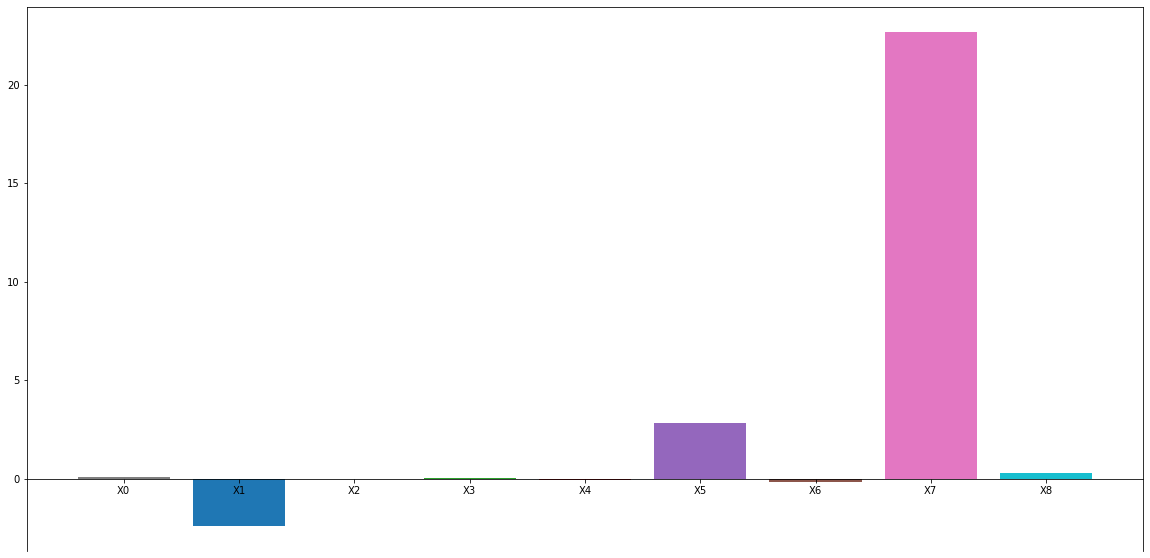

In [12]:
import matplotlib.pyplot as plt
# plotting the coefficient score
fig, ax = plt.subplots(figsize = (20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green',
        'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
        'tab:cyan']

ax.bar(lreg_coefficient['columns'], lreg_coefficient['Coefficient Estimate'], 
      color= color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

### 6.3.2: Train the Ridge Regressor

In [13]:
from sklearn.linear_model import Ridge, Lasso

# Train the Ridge Regressor

''' 
*------------------- TRAIN_Ridge_REGRESSOR  -----------------------*
|       Function: Ridge()                                          |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''
print("\n\nTraining the Support Vector Regressor on Training Data")
print("======================================================\n")
ridge_model = Ridge(alpha= 1)
ridge_model.fit(input_vector_train, output_label_train)

pred_label_train = ridge_model.predict(input_vector_train)
mean_squared_error = np.mean((output_label_train - pred_label_train)**2)
print("\nMean Squared Error on train set :", mean_squared_error)
print("=====================================================\n")

ridge_coefficient = pd.DataFrame()
ridge_coefficient['columns'] = input_vector_train.columns
ridge_coefficient['Coefficient Estimate'] = pd.Series(ridge_model.coef_)

print("\n\nCoefficients of Attributes for Linear Regression:")
print("================================================\n")
print(ridge_coefficient, '\n')



Training the Support Vector Regressor on Training Data


Mean Squared Error on train set : 18.798455310906153



Coefficients of Attributes for Linear Regression:

  columns  Coefficient Estimate
0      X0              0.081947
1      X1             -1.942956
2      X2             -0.001664
3      X3              0.029355
4      X4             -0.056727
5      X5              2.835007
6      X6             -0.162938
7      X7             18.821856
8      X8              0.329048 



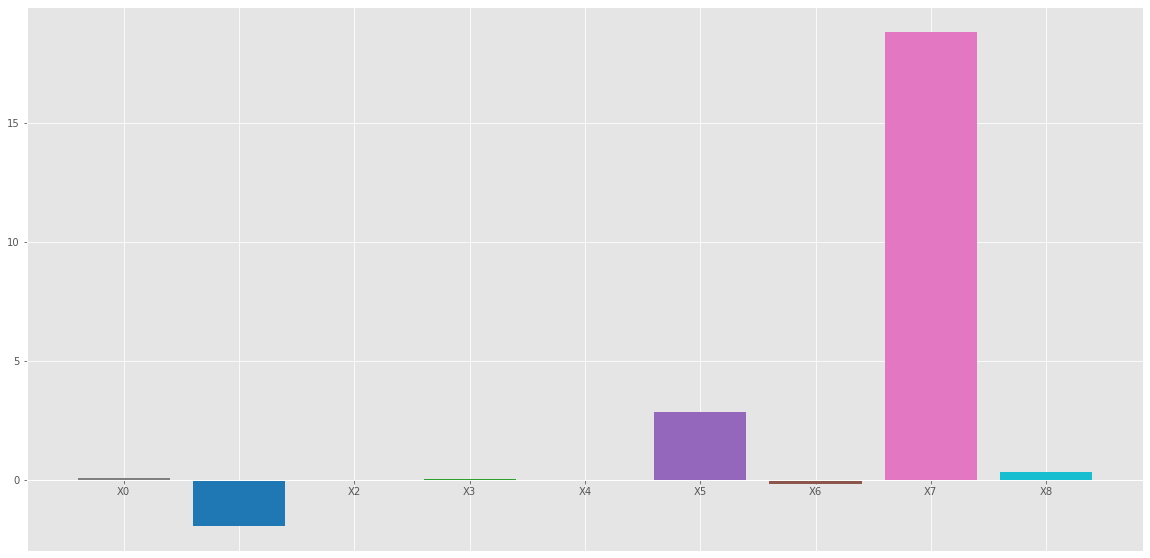

In [14]:
import matplotlib.pyplot as plt
# plotting the coefficient score
fig, ax = plt.subplots(figsize = (20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green',
        'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
        'tab:cyan']

ax.bar(ridge_coefficient['columns'], ridge_coefficient['Coefficient Estimate'], 
      color= color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

### 6.3.3: Train the Lesso Regressor

In [15]:
# Train the Support Vector Regressor

''' 
*------------------- TRAIN_LASSO_REGRESSOR  -----------------------*
|       Function: Lasso()                                          |
|           Purpose: Train the Algorithm on Training Data          |
|       Arguments:                                                 |
|           Training Data: Provide Training Data to the Model      |
|       Return:                                                    |
|           Parameter: Model return the Training Parameters        |
*------------------------------------------------------------------*
'''
print("\n\nTraining the Support Vector Regressor on Training Data")
print("======================================================\n")
lasso_model = Lasso(alpha= 1)
lasso_model.fit(input_vector_train, output_label_train)

pred_label_train = lasso_model.predict(input_vector_train)
mean_squared_error = np.mean((output_label_train - pred_label_train)**2)
print("\nMean Squared Error on train set :", mean_squared_error)
print("=====================================================\n")

lasso_coefficient = pd.DataFrame()
lasso_coefficient['columns'] = input_vector_train.columns
lasso_coefficient['Coefficient Estimate'] = pd.Series(ridge_model.coef_)

print("\n\nCoefficients of Attributes for Linear Regression:")
print("================================================\n")
print(lasso_coefficient, '\n')



Training the Support Vector Regressor on Training Data


Mean Squared Error on train set : 24.702988366204764



Coefficients of Attributes for Linear Regression:

  columns  Coefficient Estimate
0      X0              0.081947
1      X1             -1.942956
2      X2             -0.001664
3      X3              0.029355
4      X4             -0.056727
5      X5              2.835007
6      X6             -0.162938
7      X7             18.821856
8      X8              0.329048 



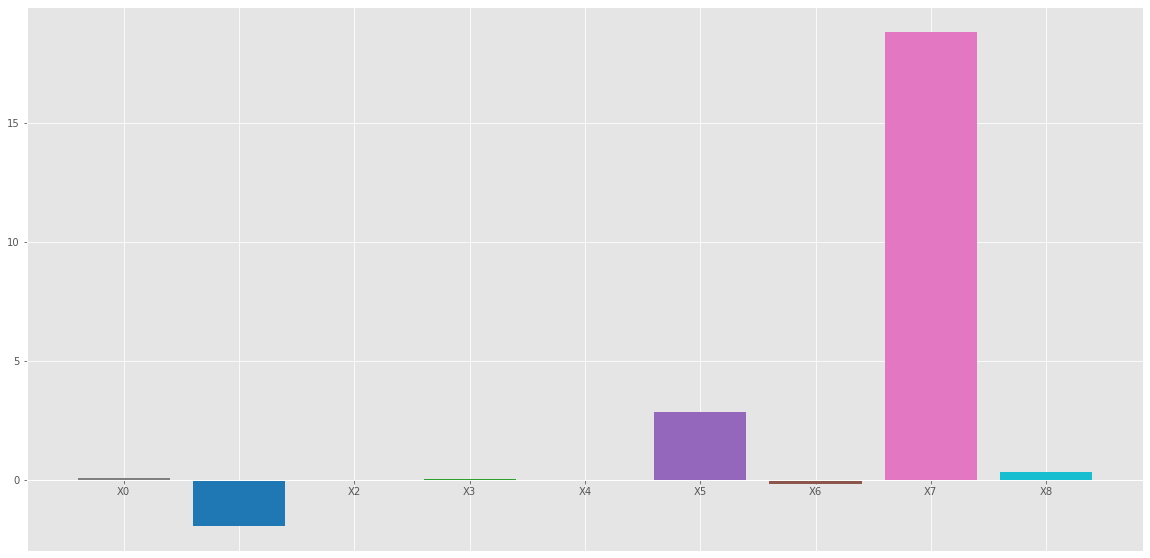

In [16]:
import matplotlib.pyplot as plt
# plotting the coefficient score
fig, ax = plt.subplots(figsize = (20,10))

color = ['tab:gray', 'tab:blue', 'tab:orange', 'tab:green',
        'tab:red', 'tab:purple', 'tab:brown', 'tab:pink',
        'tab:cyan']

ax.bar(lasso_coefficient['columns'], lasso_coefficient['Coefficient Estimate'], 
      color= color)

ax.spines['bottom'].set_position('zero')

plt.style.use('ggplot')
plt.show()

## Step 6.4: Save the Trained Models

In [17]:
# Save the Trained Models

''' 
*--------------------- SAVE_THE_TRAINED_MODELS --------------------*
|        Function: dump()                                          |
|             Purpose: Save the Trained Model on your Hard Disk    |
|        Arguments:                                                |
|             Model: Model Objects                                 |
|        Return:                                                   |
|             File: Trained Model will be Saved on Hard Disk       |
*------------------------------------------------------------------* 
'''

# Save the Models in a Pkl File

pickle.dump(lr_model, open('models/lr_trained_model.pkl', 'wb'))
pickle.dump(ridge_model, open('models/ridge_trained_model.pkl', 'wb'))
pickle.dump(lasso_model, open('models/lasso_trained_model.pkl', 'wb'))

# Step 7: Execute the Testing Phase 

## Step 7.1: Splitting Input Vectors and Outputs / Labels of Testing Data

In [18]:
# Splitting Input Vectors and Outputs/Labels of Testing Data

'''
*---------------- SPLIT_INPUT_VECTORS_AND_LABELS --------------*
|        Function: iloc()                                      |
|            Purpose: Splitting Input Vector and Labels        |
|        Arguments:                                            |
|            Attribute: Name or Location Attribute to Split    |
|        Return:                                               |
|            Attribute: Split Attributes                       |
*--------------------------------------------------------------*
'''

print("\n\nInputs Vectors (Feature Vectors) of Testing Data:")
print("=================================================\n")
input_vector_test = testing_data.iloc[:, 0:-1]
print(input_vector_test)

print("\n\nOutputs/Labels of Testing Data:")
print("==============================\n")
print("  ERP")
output_label_test = testing_data.iloc[:, -1]
print(output_label_test)



Inputs Vectors (Feature Vectors) of Testing Data:

     X0    X1      X2      X3      X4    X5    X6    X7    X8
537   2  0.86  529.20  323.40  145.53  5.67  2.97  0.40  0.90
538   1  0.69  529.20  291.06  161.70  6.93  3.24  0.32  0.90
539   2  1.04  646.80  291.06  177.87  6.93  6.05  0.48  0.81
540   0  0.74  496.12  350.35  132.30  7.70  1.98  0.44  0.99
541   1  0.81  496.12  315.32  132.30  8.47  2.97  0.48  0.90
542   0  0.90  496.12  315.32  119.07  6.93  4.40  0.32  0.99
543   2  0.90  673.75  318.50  177.87  6.93  4.95  0.44  0.90
544   1  0.78  573.30  339.57  145.53  5.67  1.98  0.40  0.81
545   2  0.71  515.97  377.30  161.70  7.70  2.43  0.36  0.81
546   0  0.79  630.63  277.83  161.70  6.30  3.96  0.40  1.10
547   0  0.71  630.63  339.57  119.07  7.70  6.05  0.36  0.99
548   2  0.68  654.89  503.97  110.25  5.67  1.80  0.40  0.99
549   2  0.76  727.65  458.15  121.28  6.93  3.63  0.40  0.90
550   2  0.61  727.65  503.97  121.28  5.67  4.84  0.44  1.21
551   2  0.92  65

767   2  0.50  800.42  404.25  218.30  2.84  4.05  0.32  4.95


Outputs/Labels of Testing Data:

  ERP
537    32.39
538    32.09
539    31.29
540    29.22
541    29.91
542    29.53
543    28.65
544    41.40
545    42.62
546    42.50
547    41.67
548    40.78
549    39.97
550    40.71
551    40.43
552    14.52
553    14.61
554    14.50
555    14.55
556    14.51
557    14.60
558    14.50
559    14.58
560    14.51
561    14.70
562    14.42
563    14.42
564    15.23
565    15.23
566    15.23
567    15.23
568    19.52
569    19.36
570    19.48
571    19.42
572    15.09
573    17.17
574    17.14
575    17.14
576    32.82
577    32.71
578    32.24
579    32.72
580    35.84
581    36.57
582    36.06
583    35.69
584    32.48
585    32.74
586    32.13
587    31.64
588    28.95
589    29.49
590    28.64
591    28.01
592    41.64
593    43.10
594    42.74
595    41.92
596    40.78
597    40.15
598    40.57
599    40.42
600    14.54
601    14.45
602    14.18
603    14.50
604    14.70
605    14.66


## Step 7.2: Load the Saved Model

In [19]:
# Load the Saved Model

''' 
*------------------- LOAD_SAVED_MODEL --------------------------*
|         Function: load()                                      |
|               Purpose: Method to Load Previously Saved Model  |
|         Arguments:                                            |
|               Model: Trained Model                            |
|         Return:                                               |
|               File: Saved Model will be Loaded in Memory      |
*---------------------------------------------------------------*
'''

# Load the Saved Model

ridge_load_model = pickle.load(open('models/ridge_trained_model.pkl', 'rb'))
lasso_load_model = pickle.load(open('models/lasso_trained_model.pkl', 'rb'))

## Step 7.3: Evaluate the Machine Learning Model
### Step 7.3.1: Make Predictions with the Trained Models on Testing Data

In [20]:
# Evaluate the Machine Learning Model

''' 
*--------------------- EVALUATE_MACHINE_LEARNING_MODEL ----------------------*
|       Function: Predict()                                                  |
|             Purpose: Make a Prediction using Algorithm on Test Data        |
|       Arguments:                                                           |
|            Testing Data: Provide Test data to the Trained Model            |
|       Return:                                                              |
|            Predictions: Model return Predictions                           |
*----------------------------------------------------------------------------* 
'''

# Provide Test data to the Trained Model

ridge_predictions = ridge_load_model.predict(input_vector_test)
testing_data.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data["Ridge Predictions"] = np.round(ridge_predictions,2)

lasso_predictions = lasso_load_model.predict(input_vector_test)
testing_data.copy(deep=True)
pd.options.mode.chained_assignment = None
testing_data["Lasso Predictions"] = np.round(lasso_predictions,2)

# Save the Predictions into CSV File

testing_data.to_csv(r'Data/model-predictions.csv', index = False, header = True)

model_predictions = testing_data 
print("\n\nPredictions Returned by both models:")
print("==========================================\n")
print(model_predictions)



Predictions Returned by both models:

     X0    X1      X2      X3      X4    X5    X6    X7    X8      Y  \
537   2  0.86  529.20  323.40  145.53  5.67  2.97  0.40  0.90  32.39   
538   1  0.69  529.20  291.06  161.70  6.93  3.24  0.32  0.90  32.09   
539   2  1.04  646.80  291.06  177.87  6.93  6.05  0.48  0.81  31.29   
540   0  0.74  496.12  350.35  132.30  7.70  1.98  0.44  0.99  29.22   
541   1  0.81  496.12  315.32  132.30  8.47  2.97  0.48  0.90  29.91   
542   0  0.90  496.12  315.32  119.07  6.93  4.40  0.32  0.99  29.53   
543   2  0.90  673.75  318.50  177.87  6.93  4.95  0.44  0.90  28.65   
544   1  0.78  573.30  339.57  145.53  5.67  1.98  0.40  0.81  41.40   
545   2  0.71  515.97  377.30  161.70  7.70  2.43  0.36  0.81  42.62   
546   0  0.79  630.63  277.83  161.70  6.30  3.96  0.40  1.10  42.50   
547   0  0.71  630.63  339.57  119.07  7.70  6.05  0.36  0.99  41.67   
548   2  0.68  654.89  503.97  110.25  5.67  1.80  0.40  0.99  40.78   
549   2  0.76  727.65  4

## Step 7.4: Calculate the Mean Absolute Error

In [21]:
# Calculate the Root Mean Squared Error

''' 
/*------------------------ CALCULATE_ROOT_MEAN_SQUARE_ERROR -----------------*
|          Function: mean_squared_error()                              |
|                Purpose: Evaluate the algorithm on Testing data       |
|          Arguments:                                                  |
|                Prediction: Predicted values                          |
|                Label: Actual values                                  |
|          Return:                                                     |
|                Root Mean Squared Error                               |
*----------------------------------------------------------------------*
'''

# Calculate the Root Mean Squared Error

ridge_model_mae = mean_absolute_error(model_predictions["Y"],model_predictions["Ridge Predictions"])
lasso_model_mae = mean_absolute_error(model_predictions["Y"],model_predictions["Lasso Predictions"])

print("\n\nRidge Mean Absolute Error:")
print("=========================\n")
print(round(ridge_model_mae,2))

print("\n\nLasso Mean Absolute Error:")
print("=========================\n")
print(round(lasso_model_mae,2))



Ridge Mean Absolute Error:

3.76


Lasso Mean Absolute Error:

5.01


# Step 8: Execute the Application Phase

## Step 8.1: Take Input from User

In [22]:
# Take Input from User

''' 
*---------------- TAKE_USER_INPUT ----------------*
'''
X0 = input("\nPlease enter your X0 : ").strip()
X1 = input("\nPlease enter your X1 : ").strip()
X2 = input("\nPlease enter your X2 : ").strip()
X3 = input("\nPlease enter your X3 : ").strip()
X4 = input("\nPlease enter your X4 : ").strip()
X5 = input("\nPlease enter your X5 : ").strip()
X6 = input("\nPlease enter your X6 : ").strip()
X7 = input("\nPlease enter your X7 : ").strip()
X8 = input("\nPlease enter your X8 : ").strip()


Please enter your X0 : 2

Please enter your X1 : 0.5

Please enter your X2 : 200

Please enter your X3 : 1

Please enter your X4 : 23

Please enter your X5 : 433

Please enter your X6 : 3

Please enter your X7 : 04

Please enter your X8 : 34


In [23]:
testing_data.head(2)

,X0,X1,X2,X3,X4,X5,X6,X7,X8,Y,Ridge Predictions,Lasso Predictions
537,2,0.86,529.2,323.40,145.53,5.67,2.97,0.40,0.9,32.39,28.01,24.36
538,1,0.69,529.2,291.06,161.70,6.93,3.24,0.32,0.9,32.09,28.42,24.49


## Step 8.2: Convert User Input into Feature Vector (Exactly Same as Feature Vectors of Sample Data)

In [24]:
# Convert User Input into Feature Vector

user_input = pd.DataFrame({ 'X0':X0, 'MYCT': [X1],'MMIN': [X2], 'MMAX': [X3],
                           'CACH': [X4], 'CHMIN': [X5],'CHMAX': [X6],
                           'X7': X7, 'X8':X8})

print("\n\nUser Input Feature Vector:")
print("==========================\n")
print(user_input)



User Input Feature Vector:

  X0 MYCT MMIN MMAX CACH CHMIN CHMAX  X7  X8
0  2  0.5  200    1   23   433     3  04  34


## Step 8.3: Label Encoding of Feature Vector (Exactly Same as Label Encoded Feature Vectors of Sample Data)
    o	As Input of Unseen Instance (Matric Marks and FSc Marks  Attributes) is already in Numeric Representation.
    o	Therefore, we will not Label Encode the Input of Unseen Instance.

In [25]:
# Load the Saved Model

''' 
*----------------------- LOAD_SAVED_MODEL --------------------------*
|         Function: load()                                          |
|             Purpose: Method to Load Previously Saved Model        |
|         Arguments:                                                |
|               Model: Trained Model                                |
|         Return:                                                   |
|               File: Saved Model will be Loaded in Memory          |
*-------------------------------------------------------------------*
'''

# Load the Saved Model

ridge_load_model = pickle.load(open('models/ridge_trained_model.pkl', 'rb'))
lasso_load_model = pickle.load(open('models/lasso_trained_model.pkl', 'rb'))

## Step 8.5: Model Prediction
### Step 8.5.1: Apply Model on the Label Encoded Feature Vector of unseen instance and return Prediction to the User

In [26]:
# Prediction of Unseen Instance

''' 
*----------------------------  MODEL_PREDICTION --------------------------*
|           Function: predict()                                           |
|                 Purpose: Use Trained Model to Predict the Output        |
|                          of Unseen Instances                            |
|           Arguments:                                                    |
|                 User Data: Label Encoded Feature Vector of              |
|                            Unseen Instances                             |
|           Return:                                                       |
|                 ERP                                                     |
*-------------------------------------------------------------------------*
'''

# Make a Prediction on Unseen Data

ridge_y = ridge_load_model.predict(user_input)
lasso_y = lasso_load_model.predict(user_input)

# Add the Prediction in a Pretty Table

pretty_table = PrettyTable()
pretty_table.add_column("       ** Ridge Prediction **       ",np.round(ridge_y,2))
print(pretty_table)

pretty_table = PrettyTable()
pretty_table.add_column("       ** Lesso Prediction **       ",np.round(lasso_y,2))
print(pretty_table)

+--------------------------------------+
|        ** Ridge Prediction **        |
+--------------------------------------+
|               1316.87                |
+--------------------------------------+
+--------------------------------------+
|        ** Lesso Prediction **        |
+--------------------------------------+
|                843.27                |
+--------------------------------------+


# Step 9: Execute the Feedback Phase
## A Two-Step Process
### Step 01: After some time, take Feedback from
    - Domain Experts and Users on deployed ERP Prediction System
### Step 02: Make a List of Possible Improvements based on Feedback received

# Step 10: Improve Model based on Feedback
### There is Always Room for Improvement
### Based on Feedback from Domain Experts and Users
    -	Improve your Model

<br><br><br>
<center> <h3 style="color:blue">==========================================================</h3> </center>
<center> <h3 style="color:green">JAZAK ALLAH KHAIR</h3> 
<center> <h3 style="color:blue">==========================================================</h3> </center>
<br><br><br>